In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

In [2]:
insurance_df = pd.read_csv('Course Materials/Data/insurance.csv') #.sample(1_000)
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
insurance_df.corr(numeric_only=True)

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<Axes: xlabel='age', ylabel='charges'>

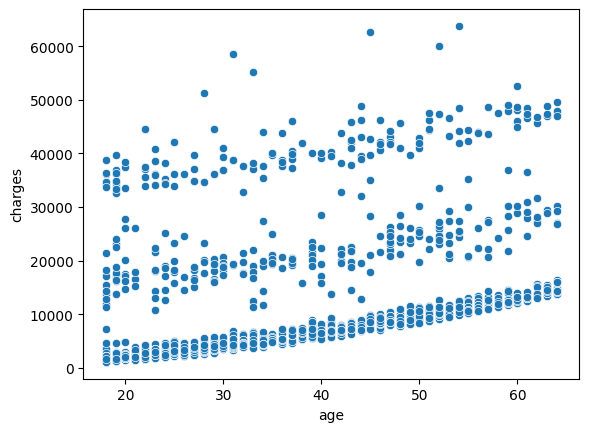

In [4]:
sns.scatterplot(insurance_df, x='age', y='charges')

In [5]:
insurance_df = insurance_df.assign(age_sq = insurance_df['age'] ** 2)

features = ['age', 'age_sq', 'bmi', 'children']

X = sm.add_constant(insurance_df[features])
y = insurance_df['charges']

model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     46.46
Date:                Sun, 29 Dec 2024   Prob (F-statistic):           1.38e-36
Time:                        20:27:10   Log-Likelihood:                -14390.
No. Observations:                1338   AIC:                         2.879e+04
Df Residuals:                    1333   BIC:                         2.882e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2136.4572   3124.995     -0.684      0.494   -8266.901    3993.986
age          -39.1218    152.588     -0.256      0.798    -338.460     260.216
age_sq         3.5196      1.903      1.849      0.065      -0.215       7.254
bmi          328.6838     51.297      6.407      0.000     228.052     429.315
children     691.9515    270.313      2.560      0.011     161.666    1222.237
==============================================================================
Omnibus:                      329.514   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              616.342
Skew:                           1.531   Prob(JB):                    1.46e-134
Kurtosis:                       4.296   Cond. No.                     2.08e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.08e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<Axes: ylabel='None'>

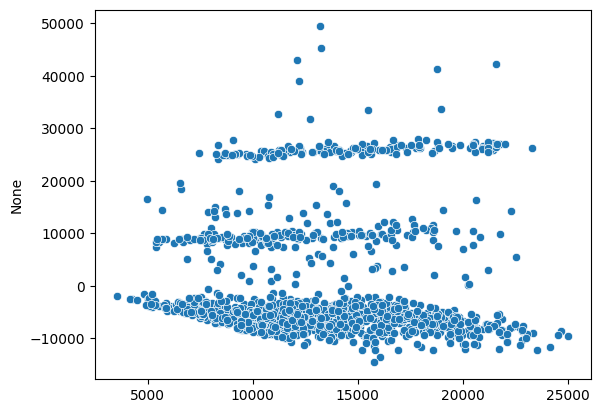

In [6]:
sns.scatterplot(x=model.predict(), y=model.resid)

In [7]:
insurance_df = pd.read_csv('Course Materials/Data/insurance.csv')

In [8]:
features = ['age', 'bmi', 'children']

X = sm.add_constant(insurance_df[features])
y = insurance_df['charges']

model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     60.69
Date:                Sun, 29 Dec 2024   Prob (F-statistic):           8.80e-37
Time:                        20:27:10   Log-Likelihood:                -14392.
No. Observations:                1338   AIC:                         2.879e+04
Df Residuals:                    1334   BIC:                         2.881e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6916.2433   1757.480     -3.935      0.000   -1.04e+04   -3468.518
age          239.9945     22.289     10.767      0.000     196.269     283.720
bmi          332.0834     51.310      6.472      0.000     231.425     432.741
children     542.8647    258.241      2.102      0.036      36.261    1049.468
==============================================================================
Omnibus:                      325.395   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              603.372
Skew:                           1.520   Prob(JB):                    9.54e-132
Kurtosis:                       4.255   Cond. No.                         290.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: ylabel='None'>

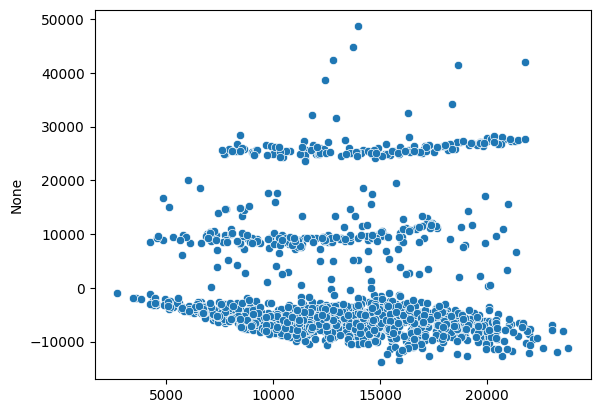

In [9]:
sns.scatterplot(x=model.predict(), y=model.resid)

((array([-3.28061069, -3.02161974, -2.87748242, ...,  2.87748242,
          3.02161974,  3.28061069], shape=(1338,)),
  array([-13883.78364557, -13438.7989169 , -12614.75938445, ...,
          42332.90584529,  44853.90870168,  48627.31414825], shape=(1338,))),
 (np.float64(9869.369097394587),
  np.float64(7.9416576214647e-12),
  np.float64(0.8672705406050434)))

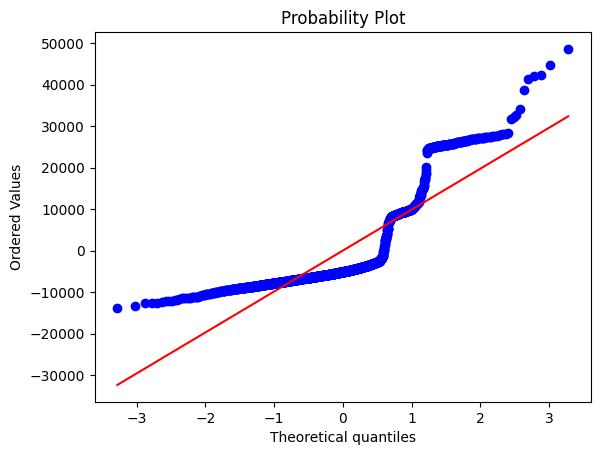

In [10]:
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(model.resid, dist='norm', plot=plt)

In [11]:
features = ['age', 'bmi', 'children']

X = sm.add_constant(insurance_df[features])
y = np.log(insurance_df['charges'])

model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     193.7
Date:                Sun, 29 Dec 2024   Prob (F-statistic):          2.82e-104
Time:                        20:27:11   Log-Likelihood:                -1543.9
No. Observations:                1338   AIC:                             3096.
Df Residuals:                    1334   BIC:                             3117.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.3189      0.119     61.643      0.000       7.086       7.552
age            0.0336      0.002     22.331      0.000       0.031       0.037
bmi            0.0113      0.003      3.252      0.001       0.004       0.018
children       0.1057      0.017      6.058      0.000       0.071       0.140
==============================================================================
Omnibus:                      193.792   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              285.149
Skew:                           1.125   Prob(JB):                     1.20e-62
Kurtosis:                       3.219   Cond. No.                         290.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: ylabel='None'>

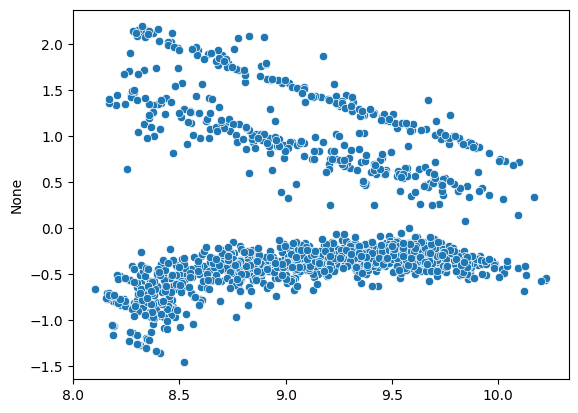

In [12]:
sns.scatterplot(x=model.predict(), y=model.resid)

((array([-3.28061069, -3.02161974, -2.87748242, ...,  2.87748242,
          3.02161974,  3.28061069], shape=(1338,)),
  array([-1.46394525, -1.36202871, -1.34321259, ...,  2.15583787,
          2.16564655,  2.19187645], shape=(1338,))),
 (np.float64(0.702871329937169),
  np.float64(2.2861201790378888e-15),
  np.float64(0.9142531031248115)))

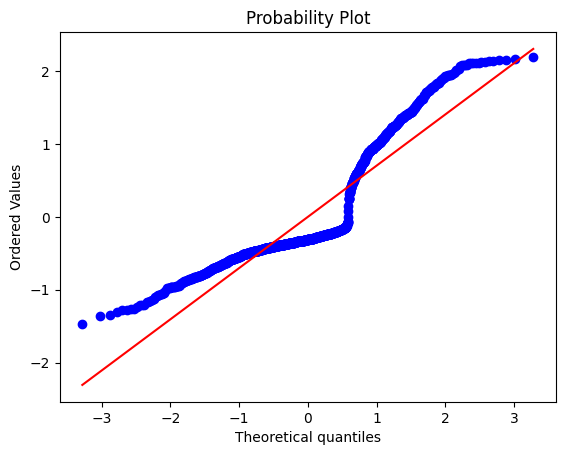

In [13]:
stats.probplot(model.resid, dist='norm', plot=plt)

In [14]:
def residual_analysis_plots(model):

    predictions = model.predict()
    residuals = model.resid

    fig, ax = plt.subplots(1, 2, sharey='all', figsize=(10,6))

    sns.scatterplot(x=predictions, y=residuals, ax=ax[0])
    ax[0].set_title('Residual Plot')
    ax[0].set_xlabel('Prediction')
    ax[0].set_ylabel('Residuals')

    stats.probplot(residuals, dist='norm', plot=ax[1])
    ax[1].set_title('Normal Q-Q Plot')

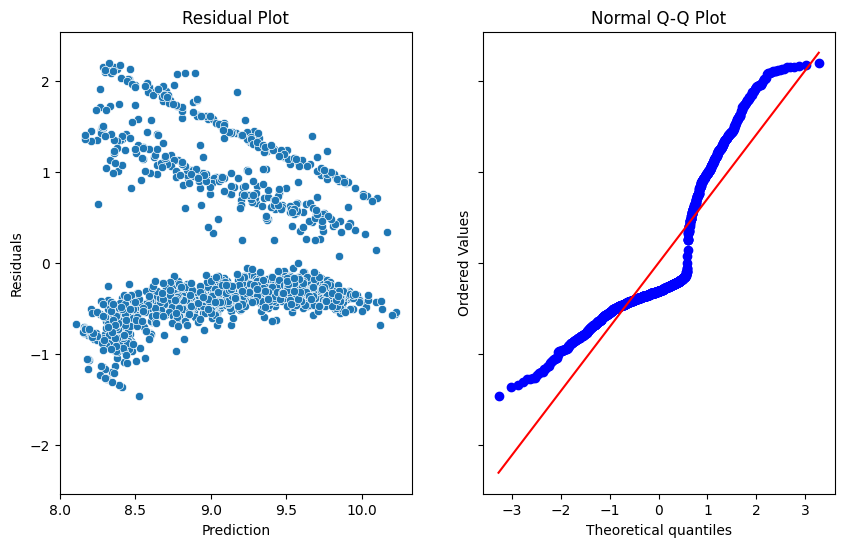

In [15]:
residual_analysis_plots(model)

In [16]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [17]:
insurance_df = insurance_df.assign(smoker_flag = np.where(insurance_df['smoker'] == 'yes', 1, 0),
                                   female_flag = np.where(insurance_df['sex'] == 'female', 1, 0),
                                   bmi_smoker_int = lambda x: x["bmi"] * x["smoker_flag"],
                                   age_sq = insurance_df['age'] ** 2)

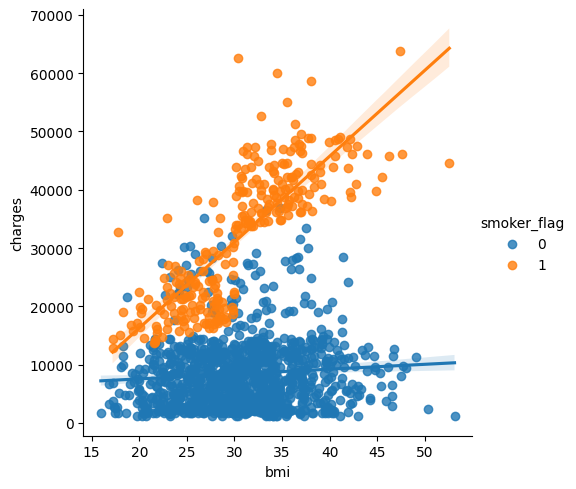

In [18]:
sns.lmplot(insurance_df, x='bmi', y='charges', hue='smoker_flag')

In [19]:
features = [
    "age", 
#     "age2x"
    "age_sq",
    "bmi", 
    "children", 
    "smoker_flag", 
#     "female_flag", 
#     "bmi_smoker_int", 
#     "age_bmi_int",
#     "smoker_sex_int"
]

X = sm.add_constant(insurance_df[features])
y = insurance_df['charges']

from scipy.stats import boxcox

model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     810.0
Date:                Sun, 29 Dec 2024   Prob (F-statistic):               0.00
Time:                        20:27:12   Log-Likelihood:                -13543.
No. Observations:                1338   AIC:                         2.710e+04
Df Residuals:                    1332   BIC:                         2.713e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -6757.5549   1661.973     -4.066      0.000      -1e+04   -3497.185
age           -54.4204     81.059     -0.671      0.502    -213.437     104.597
age_sq          3.9378      1.011      3.894      0.000       1.954       5.921
bmi           318.0431     27.251     11.671      0.000     264.584     371.502
children      640.2694    143.600      4.459      0.000     358.563     921.976
smoker_flag  2.382e+04    409.063     58.237      0.000     2.3e+04    2.46e+04
==============================================================================
Omnibus:                      309.954   Durbin-Watson:                   2.096
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              764.844
Skew:                           1.236   Prob(JB):                    8.25e-167
Kurtosis:                       5.759   Cond. No.                     2.09e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<Axes: xlabel='charges', ylabel='Count'>

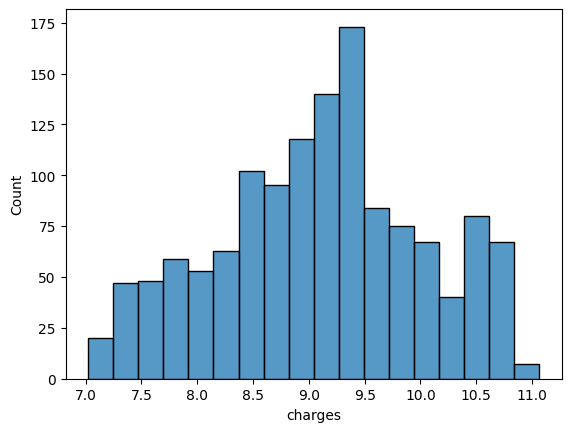

In [20]:
# y = insurance_df['charges']
# y = np.sqrt(insurance_df['charges'])
y = np.log(insurance_df['charges'])
# y = np.log10(insurance_df['charges'])
# y = 1/(insurance_df['charges'])

sns.histplot(y)

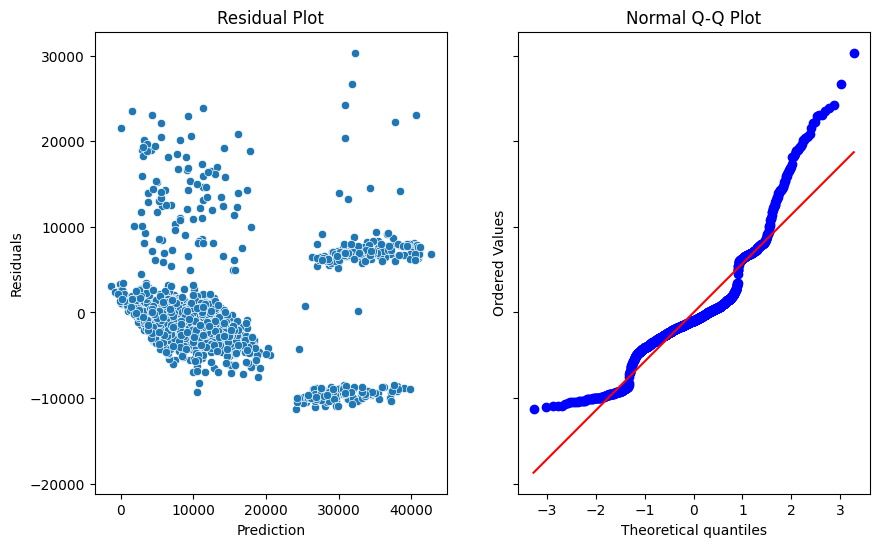

In [21]:
residual_analysis_plots(model)

In [22]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     810.0
Date:                Sun, 29 Dec 2024   Prob (F-statistic):               0.00
Time:                        20:27:13   Log-Likelihood:                -13543.
No. Observations:                1338   AIC:                         2.710e+04
Df Residuals:                    1332   BIC:                         2.713e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -6757.5549   1661.973     -4.066      0.000      -1e+04   -3497.185
age           -54.4204     81.059     -0.671      0.502    -213.437     104.597
age_sq          3.9378      1.011      3.894      0.000       1.954       5.921
bmi           318.0431     27.251     11.671      0.000     264.584     371.502
children      640.2694    143.600      4.459      0.000     358.563     921.976
smoker_flag  2.382e+04    409.063     58.237      0.000     2.3e+04    2.46e+04
==============================================================================
Omnibus:                      309.954   Durbin-Watson:                   2.096
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              764.844
Skew:                           1.236   Prob(JB):                    8.25e-167
Kurtosis:                       5.759   Cond. No.                     2.09e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
influence = model.get_influence()
inf_summary_df = influence.summary_frame()
inf_summary_df.head()

,dfb_const,dfb_age,dfb_age_sq,dfb_bmi,dfb_children,dfb_smoker_flag,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-0.066637,0.057229,-0.049518,0.014842,0.020704,-0.084114,0.002773,-1.569469,0.006710,-0.128991,-1.570333,-0.129062
1,-0.022718,0.026601,-0.023486,-0.009068,-0.006790,0.007822,0.000234,-0.530454,0.004973,-0.037502,-0.530311,-0.037492
2,-0.001102,0.002932,-0.001245,-0.005793,-0.019819,0.006854,0.000126,-0.460187,0.003563,-0.027518,-0.460051,-0.027510
3,-0.005454,0.097794,-0.102407,-0.105150,-0.103126,-0.044378,0.006506,3.158767,0.003897,0.197576,3.169474,0.198245
4,0.001874,-0.004056,0.004363,0.000722,0.004553,0.002007,0.000009,-0.141265,0.002720,-0.007377,-0.141213,-0.007375


In [25]:
inf_summary_df['cooks_d'].sort_values(ascending=False).round(5)

543     0.02629
1300    0.02452
577     0.01832
1012    0.01811
819     0.01655
         ...   
67      0.00000
1324    0.00000
464     0.00000
1221    0.00000
864     0.00000
Name: cooks_d, Length: 1338, dtype: float64